In [1]:
# Check GPU Status in Google Colob or Local Machine
!nvidia-smi  # For GPU


Wed May  7 12:22:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Check if GPU is available with pytorch
import torch
print(torch.cuda.is_available()) # True if GPU is avilable

True


In [3]:
from google.colab import drive  # for mounting google drive if needed
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def clip(value):
    return min(max(float(value), 0.0), 1.0)

# Define paths for all label directories
base_dir = '/content/drive/MyDrive/360DigiTMG_Project_265_CV/YOLOv8s-seg/Yolo format'
label_dirs = ['train/labels', 'val/labels', 'test/labels']  # Modify if test folder doesn't exist

fixed_total = 0

for dir_name in label_dirs:
    label_path = os.path.join(base_dir, dir_name)
    if not os.path.exists(label_path):
        print(f"⚠️ Skipping missing directory: {label_path}")
        continue

    fixed_count = 0
    for file in os.listdir(label_path):
        if not file.endswith('.txt'):
            continue

        full_path = os.path.join(label_path, file)

        with open(full_path, 'r') as f:
            lines = f.readlines()

        corrected_lines = []
        needs_fix = False

        for line in lines:
            parts = line.strip().split()
            if len(parts) < 2:
                continue  # skip bad lines

            class_id = parts[0]
            coords = [clip(val) for val in parts[1:]]

            if any(float(val) < 0.0 or float(val) > 1.0 for val in parts[1:]):
                needs_fix = True

            corrected_line = ' '.join([class_id] + [f'{val:.6f}' for val in coords])
            corrected_lines.append(corrected_line)

        if needs_fix:
            with open(full_path, 'w') as f:
                f.write('\n'.join(corrected_lines) + '\n')
            fixed_count += 1
            print(f'✅ Fixed: {dir_name}/{file}')

    print(f'📁 {dir_name}: {fixed_count} files corrected.\n')
    fixed_total += fixed_count

print(f'🎉 All done! Total corrected label files: {fixed_total}')


✅ Fixed: train/labels/g15_aug_8.txt
✅ Fixed: train/labels/as2_aug_2.txt
✅ Fixed: train/labels/gd (13)_aug_11.txt
✅ Fixed: train/labels/gd 29_aug_4.txt
✅ Fixed: train/labels/g15_aug_15.txt
✅ Fixed: train/labels/b28_aug_6.txt
✅ Fixed: train/labels/as6_aug_6.txt
✅ Fixed: train/labels/gd 29_aug_12.txt
✅ Fixed: train/labels/gd (28)_aug_7.txt
✅ Fixed: train/labels/as19_aug_12.txt
✅ Fixed: train/labels/as19_aug_4.txt
✅ Fixed: train/labels/fe16_aug_5.txt
✅ Fixed: train/labels/fe1_aug_6.txt
✅ Fixed: train/labels/fe10_aug_10.txt
✅ Fixed: train/labels/hp (9)_aug_15.txt
✅ Fixed: train/labels/gd (8)_aug_10.txt
✅ Fixed: train/labels/c10_aug_3.txt
✅ Fixed: train/labels/gd (8)_aug_4.txt
✅ Fixed: train/labels/g15_aug_11.txt
📁 train/labels: 19 files corrected.

✅ Fixed: val/labels/g16_aug_1.txt
✅ Fixed: val/labels/gd (11)_aug_7.txt
✅ Fixed: val/labels/gd (20)_aug_8.txt
✅ Fixed: val/labels/gd (7)_aug_13.txt
✅ Fixed: val/labels/c10_aug_1.txt
✅ Fixed: val/labels/gd (1)_aug_4.txt
✅ Fixed: val/labels/gd (13)

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [5]:
from ultralytics import YOLO

# Load a YOLOv11 model
model = YOLO('yolo11m.pt')  # Ensure 'yolov11.pt' is available or specify the correct path


100%|██████████| 38.8M/38.8M [00:00<00:00, 323MB/s]


In [6]:
# Train the YOLOv8 model
results = model.train(
    data = "/content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/data.yaml",  # Path to dataset YAML file
    epochs = 30,           # Number of epochs
    imgsz = 640,           # Image size
    batch = 6,             # Batch size
    lr0 = 0.001,            # Initial learning rate
    workers = 2,           # Number of data loader workers
    optimizer = "AdamW",     # Optimizer (SGD or Adam)
    patience = 5,         # stop if no improvement for 5 epochs
    device = 0        # Device to use (0 for GPU, 'cpu' for CPU)
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=5, perspective=

train: Scanning /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/train/labels.cache... 2236 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2236/2236 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 5.6±10.2 ms, read: 16.0±16.6 MB/s, size: 240.8 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/val/labels.cache... 639 images, 0 backgrounds, 0 corrupt: 100%|██████████| 639/639 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.000515625), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.99G       1.43      2.555      1.591         20        640: 100%|██████████| 373/373 [02:49<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:30<00:00,  1.79it/s]

                   all        639       2285      0.315      0.297      0.203      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.41G      1.469      2.407      1.669         16        640: 100%|██████████| 373/373 [01:41<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.16it/s]


                   all        639       2285       0.28      0.333      0.222       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.19G      1.431      2.293      1.647         22        640: 100%|██████████| 373/373 [01:40<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.49it/s]


                   all        639       2285      0.457      0.325      0.294      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.17G      1.362      2.113      1.596         41        640: 100%|██████████| 373/373 [01:39<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]


                   all        639       2285      0.404      0.531      0.449      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.17G      1.261      1.883      1.526         13        640: 100%|██████████| 373/373 [01:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.70it/s]


                   all        639       2285      0.474      0.588      0.538      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.19G      1.199      1.739       1.47         19        640: 100%|██████████| 373/373 [01:39<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.40it/s]


                   all        639       2285      0.571      0.609      0.605      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.18G      1.149      1.611      1.443         10        640: 100%|██████████| 373/373 [01:40<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.41it/s]


                   all        639       2285      0.685      0.614      0.689      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.17G      1.068      1.422      1.365         12        640: 100%|██████████| 373/373 [01:39<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.46it/s]

                   all        639       2285      0.614      0.675      0.707       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.19G      1.029      1.334       1.34         14        640: 100%|██████████| 373/373 [01:40<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.44it/s]

                   all        639       2285      0.721      0.746      0.802      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.14G     0.9916      1.233      1.325         31        640: 100%|██████████| 373/373 [01:40<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.57it/s]

                   all        639       2285      0.813      0.806      0.864      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.18G     0.9171      1.092      1.263         32        640: 100%|██████████| 373/373 [01:39<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.81it/s]


                   all        639       2285       0.82      0.811      0.872      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.18G     0.8902       1.06      1.244         17        640: 100%|██████████| 373/373 [01:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.62it/s]

                   all        639       2285        0.8      0.801      0.864      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.19G     0.8676      1.019      1.226         35        640: 100%|██████████| 373/373 [01:39<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.43it/s]

                   all        639       2285      0.864      0.828      0.913      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.18G      0.835     0.9462      1.202         38        640: 100%|██████████| 373/373 [01:39<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.44it/s]

                   all        639       2285      0.878      0.834      0.915      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.18G      0.805     0.9049      1.185         36        640: 100%|██████████| 373/373 [01:40<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.42it/s]

                   all        639       2285      0.854      0.871      0.931      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.19G     0.7674      0.827      1.152         23        640: 100%|██████████| 373/373 [01:40<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.48it/s]

                   all        639       2285      0.888      0.888      0.942      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.18G     0.7529     0.7894      1.145         20        640: 100%|██████████| 373/373 [01:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.62it/s]

                   all        639       2285      0.924      0.887      0.956      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.18G     0.7156     0.7338      1.118         29        640: 100%|██████████| 373/373 [01:41<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.94it/s]


                   all        639       2285      0.901      0.922      0.964      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.17G     0.7034     0.7172      1.114         21        640: 100%|██████████| 373/373 [01:42<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.86it/s]

                   all        639       2285      0.939      0.916      0.969      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.19G     0.6735     0.6705      1.092         41        640: 100%|██████████| 373/373 [01:40<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.80it/s]

                   all        639       2285      0.945      0.916      0.974      0.862


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.14G     0.5622     0.5398      1.017          8        640: 100%|██████████| 373/373 [01:41<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.50it/s]

                   all        639       2285      0.942      0.922      0.972      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.17G     0.5292     0.4806     0.9891         21        640: 100%|██████████| 373/373 [01:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.63it/s]


                   all        639       2285      0.944      0.927      0.973       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.18G     0.5091     0.4598     0.9744         19        640: 100%|██████████| 373/373 [01:40<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.68it/s]

                   all        639       2285      0.957      0.923      0.976      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.18G     0.4777     0.4139      0.954          6        640: 100%|██████████| 373/373 [01:39<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.87it/s]

                   all        639       2285      0.966      0.938      0.981      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.18G     0.4616     0.3945     0.9459         13        640: 100%|██████████| 373/373 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.28it/s]

                   all        639       2285      0.975      0.943      0.982      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.18G     0.4419     0.3604     0.9297         14        640: 100%|██████████| 373/373 [01:39<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.44it/s]

                   all        639       2285      0.976       0.95      0.985      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.19G     0.4175     0.3424     0.9125         12        640: 100%|██████████| 373/373 [01:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.07it/s]

                   all        639       2285      0.959      0.965      0.987      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.18G     0.4021     0.3192     0.9083          8        640: 100%|██████████| 373/373 [01:39<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.49it/s]

                   all        639       2285      0.974      0.962      0.986      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.18G     0.3845     0.3086     0.9029         18        640: 100%|██████████| 373/373 [01:39<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.53it/s]

                   all        639       2285       0.98      0.961      0.987      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.17G     0.3686     0.2929     0.8889         13        640: 100%|██████████| 373/373 [01:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.52it/s]

                   all        639       2285       0.98      0.962      0.988      0.936



30 epochs completed in 0.975 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.21it/s]


                   all        639       2285       0.98      0.962      0.988      0.935
          Gas Cylinder         53        322      0.971      0.966      0.989      0.931
      Fire Extingusher         51        196      0.978      0.934      0.979      0.915
Hydraulic/Pneaumatic cylinder        110        242      0.984      0.913       0.97      0.866
Aerosil cans/Paint tins         56        259      0.962      0.965      0.991      0.963
           Compressors         61        237      0.998      0.954      0.992      0.937
           Oil Filters         72        214      0.963      0.981      0.993      0.961
      Fuel tanks/ Cans        118        262      0.996       0.97      0.986       0.96
             Batteries         74        273       0.98      0.978      0.994      0.951
     Ammunition Shells         56        280      0.989      0.993      0.994      0.935
Speed: 0.3ms preprocess, 7.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to run

In [7]:
# Validation
print("\n✅ Validating the model on validation dataset...")
val_results = model.val()

# Output validation results
print("\n📊 Validation Metrics Summary:")
print(f"✅ mAP@0.5       : {val_results.box.map50:.4f}")
print(f"✅ mAP@0.5:0.95  : {val_results.box.map:.4f}")
print(f"✅ Precision     : {val_results.box.mp:.4f}")
print(f"✅ Recall        : {val_results.box.mr:.4f}")



✅ Validating the model on validation dataset...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 37.2±25.6 MB/s, size: 84.1 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/val/labels.cache... 639 images, 0 backgrounds, 0 corrupt: 100%|██████████| 639/639 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:21<00:00,  4.98it/s]


                   all        639       2285       0.98      0.962      0.988      0.937
          Gas Cylinder         53        322       0.97      0.966      0.989      0.932
      Fire Extingusher         51        196      0.978      0.934      0.979      0.917
Hydraulic/Pneaumatic cylinder        110        242      0.984      0.913       0.97      0.869
Aerosil cans/Paint tins         56        259      0.962      0.965      0.991      0.963
           Compressors         61        237      0.998      0.954      0.992       0.94
           Oil Filters         72        214      0.963      0.981      0.994      0.961
      Fuel tanks/ Cans        118        262      0.996       0.97      0.987      0.961
             Batteries         74        273       0.98      0.978      0.993      0.953
     Ammunition Shells         56        280      0.989      0.993      0.994      0.935
Speed: 0.4ms preprocess, 21.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to ru

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


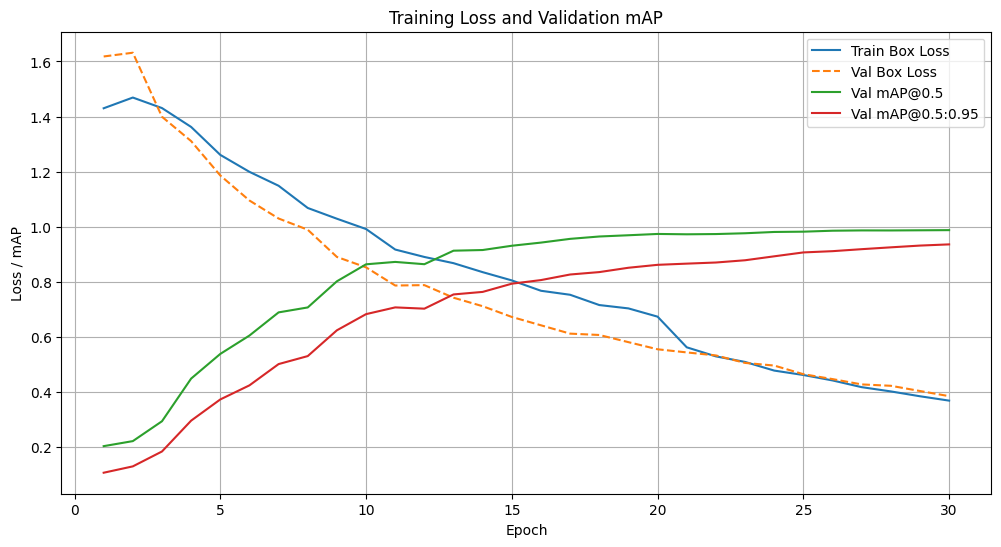

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Load results.csv from the training run
results_df = pd.read_csv('/content/runs/detect/train/results.csv')

# Print actual column names to avoid KeyErrors
print(results_df.columns)

plt.figure(figsize=(12, 6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss', linestyle='--')
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='Val mAP@0.5')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='Val mAP@0.5:0.95')

plt.xlabel('Epoch')
plt.ylabel('Loss / mAP')
plt.title('Training Loss and Validation mAP')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Test the model
print("\nTesting the model...")
test_images_dir = "/content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images"  # Path to test images directory
test_results = model.predict(
    source=test_images_dir,  # Path to test images
    save=True,               # Save predictions
    save_txt=True,           # Save predictions as text files
    save_conf=True,          # Save confidence scores
    conf=0.25,               # Confidence threshold
    iou=0.45                 # IoU threshold

)




Testing the model...

image 1/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (1)_aug_15.jpg: 448x640 4 Aerosil cans/Paint tinss, 280.7ms
image 2/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (1)_aug_5.jpg: 448x640 4 Aerosil cans/Paint tinss, 70.7ms
image 3/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (12)_aug_1.jpg: 480x640 4 Aerosil cans/Paint tinss, 52.6ms
image 4/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (12)_aug_13.jpg: 480x640 4 Aerosil cans/Paint tinss, 63.4ms
image 5/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (12)_aug_15.jpg: 480x640 4 Aerosil cans/Paint tinss, 39.8ms
image 6/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (12)_aug_5.jpg: 480x640 3 Aerosil cans/Paint tinss, 29.2ms
image 7/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (14)_

In [13]:
metrics = model.val(split='test')  # Use test images as defined in dataset.yaml
print(metrics)


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 99.4±118.9 MB/s, size: 335.2 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/test/labels.cache... 320 images, 0 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.81it/s]


                   all        320       1106      0.987      0.949      0.988      0.938
          Gas Cylinder         17         95      0.979      0.895      0.976      0.936
      Fire Extingusher         32        117          1       0.94      0.989      0.916
Hydraulic/Pneaumatic cylinder         64        131          1      0.949       0.99      0.909
Aerosil cans/Paint tins         37        156      0.972      0.949      0.986      0.953
           Compressors         28        110          1      0.965      0.994      0.952
           Oil Filters         28         77       0.98      0.974      0.994      0.965
      Fuel tanks/ Cans         52        104          1      0.941      0.978      0.948
             Batteries         40        162      0.971      0.957      0.992      0.943
     Ammunition Shells         28        154       0.98      0.974       0.99      0.917
Speed: 0.8ms preprocess, 19.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to ru

In [14]:
print("\n[RESULT] Test Set Evaluation Metrics:")
print(f" - mAP@0.5:       {metrics.box.map50:.4f}")
print(f" - mAP@0.5:0.95:  {metrics.box.map:.4f}")
print(f" - Precision:     {metrics.box.mp:.4f}")
print(f" - Recall:        {metrics.box.mr:.4f}")



[RESULT] Test Set Evaluation Metrics:
 - mAP@0.5:       0.9876
 - mAP@0.5:0.95:  0.9376
 - Precision:     0.9870
 - Recall:        0.9493


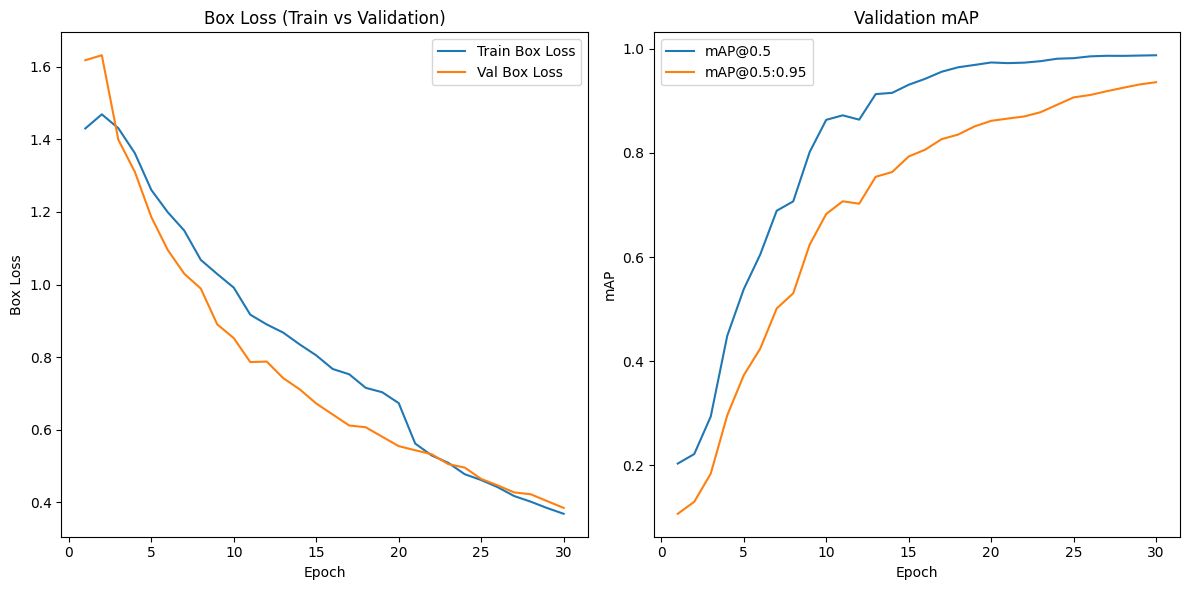

In [15]:
plt.figure(figsize=(12, 6))

# Plot box loss
plt.subplot(1, 2, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss (Train vs Validation)')
plt.legend()

# Plot mAP (adjust to correct column names)
plt.subplot(1, 2, 2)
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Validation mAP')
plt.legend()

plt.tight_layout()
plt.show()


image 1/1 /content/drive/MyDrive/project_265_yolov8/Yolo_conversion/test/images/g4_aug_10.png: 480x640 5 Gas Cylinders, 29.2ms
Speed: 3.2ms preprocess, 29.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects Count per Class:
Class 0: 5 objects


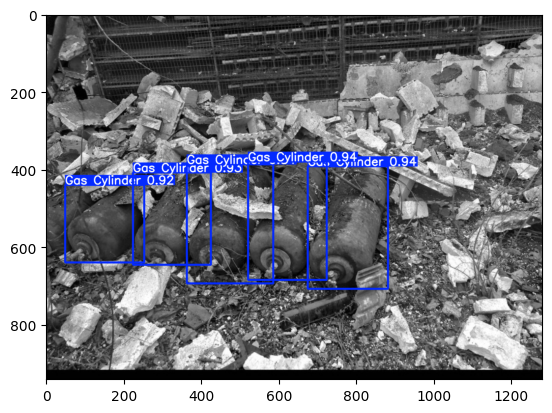


Detected Objects with Class Names:
Gas Cylinder: 5 objects


In [32]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the trained YOLOv8 model (assuming you have a trained model)
# model = YOLO('/content/drive/MyDrive/yolov8_trained_model/best.pt')  # Path to your trained model

# Step 2: Make predictions on an image (single or batch)
image_path = '/content/drive/MyDrive/project_265_yolov8/Yolo_conversion/test/images/g4_aug_10.png'  # Path to an image for inference
results = model.predict(image_path, conf = 0.30)  # Make predictions on the image

# Step 3: Count the number of objects for each class
detected_classes = results[0].boxes.cls.cpu().numpy()  # Extract class IDs from predictions

# Count the occurrences of each class
class_counts = {}
for cls in detected_classes:
    class_counts[int(cls)] = class_counts.get(int(cls), 0) + 1

# Print the count of objects per class
print("Detected Objects Count per Class:")
for class_id, count in class_counts.items():
    print(f"Class {class_id}: {count} objects")

# Step 4: Optionally, show the image with bounding boxes and labels
# Visualize the results
plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.show()
# Access the Results object from the list
results = results[0] # Get the Results object from the list

# Additional: You can use the class names from your dataset.yaml for better output
class_names = results.names  # If you want class names instead of IDs

print("\nDetected Objects with Class Names:")
for class_id, count in class_counts.items():
    print(f"{class_names[class_id]}: {count} objects")


In [17]:
print(f"Final Training Results Summary:")
print(f"📉 Final Train Box Loss: {results_df['train/box_loss'].iloc[-1]:.4f}")
print(f"📉 Final Val Box Loss: {results_df['val/box_loss'].iloc[-1]:.4f}")
print(f"✅ Final Val mAP@0.5: {results_df['metrics/mAP50(B)'].iloc[-1]:.4f}")
print(f"✅ Final Val mAP@0.5:0.95: {results_df['metrics/mAP50-95(B)'].iloc[-1]:.4f}")

print("\n[INFO] For test set:")
print(f"✅ Test mAP@0.5: {metrics.box.map50:.4f}")
print(f"✅ Test mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"✅ Test Precision: {metrics.box.mp:.4f}")
print(f"✅ Test Recall: {metrics.box.mr:.4f}")


Final Training Results Summary:
📉 Final Train Box Loss: 0.3686
📉 Final Val Box Loss: 0.3849
✅ Final Val mAP@0.5: 0.9876
✅ Final Val mAP@0.5:0.95: 0.9358

[INFO] For test set:
✅ Test mAP@0.5: 0.9876
✅ Test mAP@0.5:0.95: 0.9376
✅ Test Precision: 0.9870
✅ Test Recall: 0.9493
